In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x=df.drop(columns="Outcome")
y=df["Outcome"]

In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [6]:
model=Sequential()
# 3 layers
model.add(Dense(12,activation='relu',input_dim=8))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [7]:
#binary entropy hinge, squared hinge loss
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [8]:
# epochs 50
#batch 10
history=model.fit(x,y,epochs=50,batch_size=10)

Epoch 1/50
77/77 [==============================] - 2s 2ms/step - loss: 6.4104 - accuracy: 0.4141
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 1.4638 - accuracy: 0.5234
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 1.2583 - accuracy: 0.5626
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 1.1162 - accuracy: 0.5892
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 0.9156 - accuracy: 0.6012
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 0.7685 - accuracy: 0.6234
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 0.8571 - accuracy: 0.5979
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 0.7896 - accuracy: 0.6259
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss: 0.7310 - accuracy: 0.6429
Epoch 10/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.6346
Epoch 11/50
77/77 [

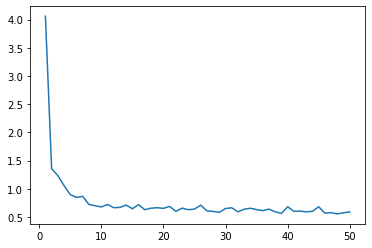

In [9]:
plt.plot(range(1,51),history.history["loss"])

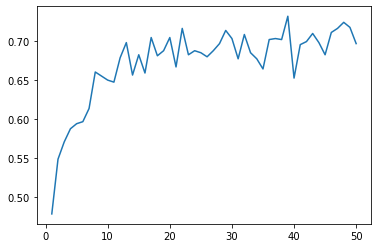

In [11]:
plt.plot(range(1,51),history.history["accuracy"])

In [12]:
x.shape

(768, 8)

In [13]:
ypred=model.predict_classes(x)

C:\Users\Krishna\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [14]:
ypred.flatten()

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [15]:
loss,acc=model.evaluate(x,y)

24/24 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.7331


In [16]:
acc

0.7330729365348816

In [17]:
loss

0.5435768961906433